# House Price Prediction - Data Preprocessing and Feature Engineering

## Data Preprocessing

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#loading data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

# Verify shapes
print("Train Data Shape:", df_train.shape)
print("\nTest Data Shape:", df_test.shape)

Train Data Shape: (1460, 81)

Test Data Shape: (1459, 80)


In [5]:
print("Train Data Preview:")
display(df_train.tail())

print("\nTest Data Preview:")
display(df_test.head())

Train Data Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500



Test Data Preview:


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [6]:
# Display information about the DataFrames
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int6

### Data has missing values, which needs to be handled, rest data types are fine

#### The column Id is just number to identify in this dataset. So this column is not really a part of the information we should care about. We can drop this column or make it the index for this dataset.

In [7]:
df_train.set_index(df_train.Id, inplace=True)
df_train.drop("Id", axis=1, inplace=True)

df_test.set_index(df_test.Id, inplace=True)
df_test.drop("Id", axis=1, inplace=True)

In [8]:
print("Train Data Info:")
df_train.info()

print("\nTest Data Info:")
df_test.info()

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 

In [10]:
print("Train Data describe:")
cm = sns.light_palette("blue", as_cmap=True)
display(df_train.describe().T.style.background_gradient(cmap=cm))

print("\nTest Data describe:")
display(df_test.describe().T.style.background_gradient(cmap=cm))

Train Data describe:


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1460.000000,56.897260,42.300571,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1201.000000,70.049958,24.284752,21.000000,59.000000,69.000000,80.000000,313.000000
LotArea,1460.000000,10516.828082,9981.264932,1300.000000,7553.500000,9478.500000,11601.500000,215245.000000
OverallQual,1460.000000,6.099315,1.382997,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1460.000000,5.575342,1.112799,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1460.000000,1971.267808,30.202904,1872.000000,1954.000000,1973.000000,2000.000000,2010.000000
YearRemodAdd,1460.000000,1984.865753,20.645407,1950.000000,1967.000000,1994.000000,2004.000000,2010.000000
MasVnrArea,1452.000000,103.685262,181.066207,0.000000,0.000000,0.000000,166.000000,1600.000000
BsmtFinSF1,1460.000000,443.639726,456.098091,0.000000,0.000000,383.500000,712.250000,5644.000000
BsmtFinSF2,1460.000000,46.549315,161.319273,0.000000,0.000000,0.000000,0.000000,1474.000000



Test Data describe:


,count,mean,std,min,25%,50%,75%,max
MSSubClass,1459.000000,57.378341,42.746880,20.000000,20.000000,50.000000,70.000000,190.000000
LotFrontage,1232.000000,68.580357,22.376841,21.000000,58.000000,67.000000,80.000000,200.000000
LotArea,1459.000000,9819.161069,4955.517327,1470.000000,7391.000000,9399.000000,11517.500000,56600.000000
OverallQual,1459.000000,6.078821,1.436812,1.000000,5.000000,6.000000,7.000000,10.000000
OverallCond,1459.000000,5.553804,1.113740,1.000000,5.000000,5.000000,6.000000,9.000000
YearBuilt,1459.000000,1971.357779,30.390071,1879.000000,1953.000000,1973.000000,2001.000000,2010.000000
YearRemodAdd,1459.000000,1983.662783,21.130467,1950.000000,1963.000000,1992.000000,2004.000000,2010.000000
MasVnrArea,1444.000000,100.709141,177.625900,0.000000,0.000000,0.000000,164.000000,1290.000000
BsmtFinSF1,1458.000000,439.203704,455.268042,0.000000,0.000000,350.500000,753.500000,4010.000000
BsmtFinSF2,1458.000000,52.619342,176.753926,0.000000,0.000000,0.000000,0.000000,1526.000000


In [11]:
print("Train Data describe:")
df_train.describe(include=["category", "object"]).T

Train Data describe:


,count,unique,top,freq
MSZoning,1460,5,RL,1151
Street,1460,2,Pave,1454
Alley,91,2,Grvl,50
LotShape,1460,4,Reg,925
LandContour,1460,4,Lvl,1311
Utilities,1460,2,AllPub,1459
LotConfig,1460,5,Inside,1052
LandSlope,1460,3,Gtl,1382
Neighborhood,1460,25,NAmes,225
Condition1,1460,9,Norm,1260


In [12]:
print("Test Data describe:")
df_test.describe(include=["category", "object"]).T

Test Data describe:


,count,unique,top,freq
MSZoning,1455,5,RL,1114
Street,1459,2,Pave,1453
Alley,107,2,Grvl,70
LotShape,1459,4,Reg,934
LandContour,1459,4,Lvl,1311
Utilities,1457,1,AllPub,1457
LotConfig,1459,5,Inside,1081
LandSlope,1459,3,Gtl,1396
Neighborhood,1459,25,NAmes,218
Condition1,1459,9,Norm,1251


In [13]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"No missing values detected in {rows:,} rows")
        else:
            print(f"{missing_count} missing values found in {rows:,} rows")

print("Missing value train dataset: ")
displayNULL(df=df_train)

print("\nMissing value test dataset: ")
displayNULL(df=df_test)

Missing value train dataset: 
Column: LotFrontage: 259
Column: Alley: 1369
Column: MasVnrType: 872
Column: MasVnrArea: 8
Column: BsmtQual: 37
Column: BsmtCond: 37
Column: BsmtExposure: 38
Column: BsmtFinType1: 37
Column: BsmtFinType2: 38
Column: Electrical: 1
Column: FireplaceQu: 690
Column: GarageType: 81
Column: GarageYrBlt: 81
Column: GarageFinish: 81
Column: GarageQual: 81
Column: GarageCond: 81
Column: PoolQC: 1453
Column: Fence: 1179
Column: MiscFeature: 1406

Missing value test dataset: 
Column: MSZoning: 4
Column: LotFrontage: 227
Column: Alley: 1352
Column: Utilities: 2
Column: Exterior1st: 1
Column: Exterior2nd: 1
Column: MasVnrType: 894
Column: MasVnrArea: 15
Column: BsmtQual: 44
Column: BsmtCond: 45
Column: BsmtExposure: 44
Column: BsmtFinType1: 42
Column: BsmtFinSF1: 1
Column: BsmtFinType2: 42
Column: BsmtFinSF2: 1
Column: BsmtUnfSF: 1
Column: TotalBsmtSF: 1
Column: BsmtFullBath: 2
Column: BsmtHalfBath: 2
Column: KitchenQual: 1
Column: Functional: 2
Column: FireplaceQu: 73

In [14]:
# Fill value for numerical feature.
def fill_missing_value(df):
    for column in df.select_dtypes(include="number").columns:
        if df[column].isna().sum() > 0:
            df[column] = df[column].fillna(df[column].mode()[0])
        else:
            pass
fill_missing_value(df=df_train)
fill_missing_value(df=df_test)

In [15]:
print("Missing value train dataset after filling value for numerical feature: ")
displayNULL(df=df_train)

print("\nMissing value test dataset after filling value for numerical feature: ")
displayNULL(df=df_test)

Missing value train dataset after filling value for numerical feature: 
Column: Alley: 1369
Column: MasVnrType: 872
Column: BsmtQual: 37
Column: BsmtCond: 37
Column: BsmtExposure: 38
Column: BsmtFinType1: 37
Column: BsmtFinType2: 38
Column: Electrical: 1
Column: FireplaceQu: 690
Column: GarageType: 81
Column: GarageFinish: 81
Column: GarageQual: 81
Column: GarageCond: 81
Column: PoolQC: 1453
Column: Fence: 1179
Column: MiscFeature: 1406

Missing value test dataset after filling value for numerical feature: 
Column: MSZoning: 4
Column: Alley: 1352
Column: Utilities: 2
Column: Exterior1st: 1
Column: Exterior2nd: 1
Column: MasVnrType: 894
Column: BsmtQual: 44
Column: BsmtCond: 45
Column: BsmtExposure: 44
Column: BsmtFinType1: 42
Column: BsmtFinType2: 42
Column: KitchenQual: 1
Column: Functional: 2
Column: FireplaceQu: 730
Column: GarageType: 76
Column: GarageFinish: 78
Column: GarageQual: 78
Column: GarageCond: 78
Column: PoolQC: 1456
Column: Fence: 1169
Column: MiscFeature: 1408
Column: 

### Categorical features

In [16]:
# MSZoning
df_test["MSZoning"] = df_test["MSZoning"].fillna(df_test["MSZoning"].mode()[0])

# Alley
df_train["Alley"] = df_train["Alley"].fillna("No alley access")
df_test["Alley"] = df_test["Alley"].fillna("No alley access")

# Utilities, Exterior1st, Exterior2nd
df_test["Utilities"] = df_test["Utilities"].fillna(df_test["Utilities"].mode()[0])
df_test["Exterior1st"] = df_test["Exterior1st"].fillna(df_test["Exterior1st"].mode()[0])
df_test["Exterior2nd"] = df_test["Exterior2nd"].fillna(df_test["Exterior2nd"].mode()[0])

# MasVnrType
df_train["MasVnrType"] = df_train["MasVnrType"].replace("None", "No masonry veneer")
df_train["MasVnrType"] = df_train["MasVnrType"].fillna("No masonry veneer")
df_test["MasVnrType"] = df_test["MasVnrType"].replace("None", "No masonry veneer")
df_test["MasVnrType"] = df_test["MasVnrType"].fillna("No masonry veneer")

# BsmtQual
df_train["BsmtQual"] = df_train["BsmtQual"].fillna("No basement")
df_test["BsmtQual"] = df_test["BsmtQual"].fillna("No basement")

# BsmtCond
df_train["BsmtCond"] = df_train["BsmtCond"].fillna("No basement")
df_test["BsmtCond"] = df_test["BsmtCond"].fillna("No basement")

# BsmtExposure
df_train["BsmtExposure"] = df_train["BsmtExposure"].fillna("No basement")
df_test["BsmtExposure"] = df_test["BsmtExposure"].fillna("No basement")

# BsmtFinType1
df_train["BsmtFinType1"] = df_train["BsmtFinType1"].fillna("No basement")
df_test["BsmtFinType1"] = df_test["BsmtFinType1"].fillna("No basement")

# BsmtFinType2
df_train["BsmtFinType2"] = df_train["BsmtFinType2"].fillna("No basement")
df_test["BsmtFinType2"] = df_test["BsmtFinType2"].fillna("No basement")

# KitchenQual, Functional
df_test["KitchenQual"] = df_test["KitchenQual"].fillna(df_test["KitchenQual"].mode()[0])
df_test["Functional"] = df_test["Functional"].fillna(df_test["Functional"].mode()[0])

# FireplaceQu
df_train["FireplaceQu"] = df_train["FireplaceQu"].fillna("No fireplace")
df_test["FireplaceQu"] = df_test["FireplaceQu"].fillna("No fireplace")

# Electrical
df_train["Electrical"] = df_train["Electrical"].fillna(df_train["Electrical"].mode()[0])

# GarageType
df_train["GarageType"] = df_train["GarageType"].fillna("No garage")
df_test["GarageType"] = df_test["GarageType"].fillna("No garage")

# GarageFinish
df_train["GarageFinish"] = df_train["GarageFinish"].fillna("No garage")
df_test["GarageFinish"] = df_test["GarageFinish"].fillna("No garage")

# GarageQual
df_train["GarageQual"] = df_train["GarageQual"].fillna("No garage")
df_test["GarageQual"] = df_test["GarageQual"].fillna("No garage")

# GarageCond
df_train["GarageCond"] = df_train["GarageCond"].fillna("No garage")
df_test["GarageCond"] = df_test["GarageCond"].fillna("No garage")

# PoolQC
df_train["PoolQC"] = df_train["PoolQC"].fillna("No pool")
df_test["PoolQC"] = df_test["PoolQC"].fillna("No pool")

# Fence
df_train["Fence"] = df_train["Fence"].fillna("No fence")
df_test["Fence"] = df_test["Fence"].fillna("No fence")

# MiscFeature
df_train["MiscFeature"] = df_train["MiscFeature"].fillna("No miscellaneous")
df_test["MiscFeature"] = df_test["MiscFeature"].fillna("No miscellaneous")

# SaleType
df_test["SaleType"] = df_test["SaleType"].fillna(df_test["SaleType"].mode()[0])


In [17]:
datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

for name, data in datasets.items():
    displayNULL(df=data, dataset_name=name, style=2)
    print()

Training Data Missing Value Analysis
No missing values detected in 1,460 rows

Test Data Missing Value Analysis
No missing values detected in 1,459 rows



### checking for duplicate values

In [ ]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"{dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"No duplicates found in {total_rows:,} rows")
    else:
        print(f"{duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

datasets = {
    "Training Data": df_train,
    "Test Data": df_test
}

duplicate_summary = {}
for name, data in datasets.items():
    check_duplicates_report(data, name)
    duplicate_summary[name] = {
        "duplicates": data.duplicated().sum(),
        "total_rows": len(data)
    }
    print()

🔍 Training Data Duplicate Analysis
No duplicates found in 1,460 rows

🔍 Test Data Duplicate Analysis
No duplicates found in 1,459 rows



### checking for outliers

In [ ]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"{dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        if dataset_name == "Test data" and feature == "SalePrice":
            pass # The test data does not exist SalePrice.
        else:
            Q1 = df[feature].quantile(0.25)
            Q3 = df[feature].quantile(0.75)
            IQR = Q3 - Q1

            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
            if len(outliers) == 0:
                pass
            else:
                outlier_info.append({
                "Feature": feature,
                "Outlier Count": len(outliers)
                })
    return pd.DataFrame(outlier_info)
num_features = ["MSSubClass", "LotFrontage", "LotArea", "OverallQual", "OverallCond", "YearBuilt", "YearRemodAdd", "MasVnrArea", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", "2ndFlrSF", "LowQualFinSF", "GrLivArea", "BsmtFullBath", "BsmtHalfBath", "FullBath", "HalfBath",
                "BedroomAbvGr", "KitchenAbvGr", "TotRmsAbvGrd", "Fireplaces", "GarageYrBlt", "GarageCars", "GarageArea", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "PoolArea", "MiscVal", "MoSold", "YrSold", "SalePrice"]

checking_outlier(list_feature=num_features, df=df_train, dataset_name="Training data")

🔍 Training data Checking outlier


,Feature,Outlier Count
0,MSSubClass,103
1,LotFrontage,106
2,LotArea,69
3,OverallQual,2
4,OverallCond,125
5,YearBuilt,7
6,MasVnrArea,98
7,BsmtFinSF1,7
8,BsmtFinSF2,167
9,BsmtUnfSF,29


Missing Values Analysis

- We conducted a thorough check for missing values across the training, test datasets.  
- The missing values were detected in the datasets. About numerical feature, we used method mode to fill missing values and about categorical feature, we need to check each categorical feature carefully because there are features that have NA value but different meanings, such as feature Alley: NA No alley access. or FireplaceQu: NA - No Fireplace
- The completeness of data simplifies preprocessing since we do not need to perform imputation or remove incomplete records.

Duplicate Records Analysis

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- No duplicate records were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Training Data: 0 duplicates out of 1460 rows  
  - Test Data: 0 duplicates out of 1459 rows 
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

Outliers Records Analysis

- We also examined the datasets for checking outliers.
- The outliers were found in dataset at features. But we can not remove them since these outliers reflect reality.

## Feature Engineering

In [29]:
def plot_numerical_features(df_train, df_test, num_features):
    if "SalePrice" in num_features:
        pass
    else:
        colors = sns.color_palette("Blues", 2)
        n = len(num_features)

        fig, axes = plt.subplots(n, 2, figsize=(12, n * 4))
        axes = np.array(axes).reshape(n, 2)

        for i, feature in enumerate(num_features):
            sns.histplot(data=df_train[feature], color=colors[0], bins=20, kde=True, ax=axes[i, 0], label="Train data")
            sns.histplot(data=df_test[feature], color=colors[1], bins=20, kde=True, ax=axes[i, 0], label="Test data")
            axes[i, 0].set_title(f"Histogram of {feature}")
            axes[i, 0].legend()
            
            axes[i, 0].set_ylabel("")
            axes[i, 0].grid(color="gray", linestyle=":", linewidth=0.7)
            axes[i, 0].axvline(df_train[feature].median(), color="green", linestyle="--", label="Median Train")
            axes[i, 0].axvline(df_test[feature].median(), color="orange", linestyle="--", label="Median Test")
            sns.despine(left=False, bottom=False, ax=axes[i, 0])

            df_plot = pd.concat([
                pd.DataFrame({'Dataset': 'Train data', feature: df_train[feature]}),
                pd.DataFrame({'Dataset': 'Test data', feature: df_test[feature]})
            ])

            sns.boxplot(
                data=df_plot,
                x=feature,
                y="Dataset",
                palette=colors,
                orient="h",
                ax=axes[i, 1]
            )
            axes[i, 1].set_title(f"Horizontal Boxplot of {feature}")
            # axes[i, 1].set_facecolor("lightgray")
            axes[i, 1].grid(color="gray", linestyle=":", linewidth=0.7)
            sns.despine(left=False, bottom=False, ax=axes[i, 1])

        plt.tight_layout()
        plt.show()

plot_numerical_features(df_train, df_test, num_features=num_features)

In [21]:
# Total square footage
df_train["TotalSF"] = df_train["TotalBsmtSF"] + df_train["1stFlrSF"] + df_train["2ndFlrSF"]
df_test["TotalSF"] = df_test["TotalBsmtSF"] + df_test["1stFlrSF"] + df_test["2ndFlrSF"]

In [22]:
# Bathrooms per bedroom
df_train["Bath_per_Bedroom"] = df_train["FullBath"] / (df_train["BedroomAbvGr"] + 1)
df_test["Bath_per_Bedroom"] = df_test["FullBath"] / (df_test["BedroomAbvGr"] + 1)

In [23]:
# Age of house
df_train["HouseAge"] = df_train["YrSold"] - df_train["YearBuilt"]
df_test["HouseAge"] = df_test["YrSold"] - df_test["YearBuilt"]

In [24]:
# Age of garage
# While checking the test set, I found that the value 2207 exists in the column GarageYrBlt. Obviously there was an error in the input process. We need to fix the value to 2007.
index = df_test[df_test["GarageYrBlt"] == 2207.0].index
df_test.loc[index, "GarageYrBlt"] = 2007.0

df_train["GarageAge"] = df_train["YrSold"] - df_train["GarageYrBlt"]
df_test["GarageAge"] = df_test["YrSold"] - df_test["GarageYrBlt"]

In [25]:
# Total rooms (bedrooms + total above ground rooms + bathrooms)
df_train["TotalRooms"] = df_train["BedroomAbvGr"] + df_train["TotRmsAbvGrd"] + df_train["FullBath"] + df_train["HalfBath"] + df_train["BsmtFullBath"] + df_train["BsmtHalfBath"]
df_test["TotalRooms"] = df_test["BedroomAbvGr"] + df_test["TotRmsAbvGrd"] + df_test["FullBath"] + df_test["HalfBath"] + df_test["BsmtFullBath"] + df_test["BsmtHalfBath"]

In [26]:
df_train["TotalPorchSF"] = (df_train["OpenPorchSF"] + df_train["EnclosedPorch"] + df_train["3SsnPorch"] + df_train["ScreenPorch"])
df_test["TotalPorchSF"] = (df_test["OpenPorchSF"] + df_test["EnclosedPorch"] + df_test["3SsnPorch"] + df_test["ScreenPorch"])

In [27]:
df_train["QualArea"] = df_train["OverallQual"] * df_train["GrLivArea"]
df_test["QualArea"] = df_test["OverallQual"] * df_test["GrLivArea"]

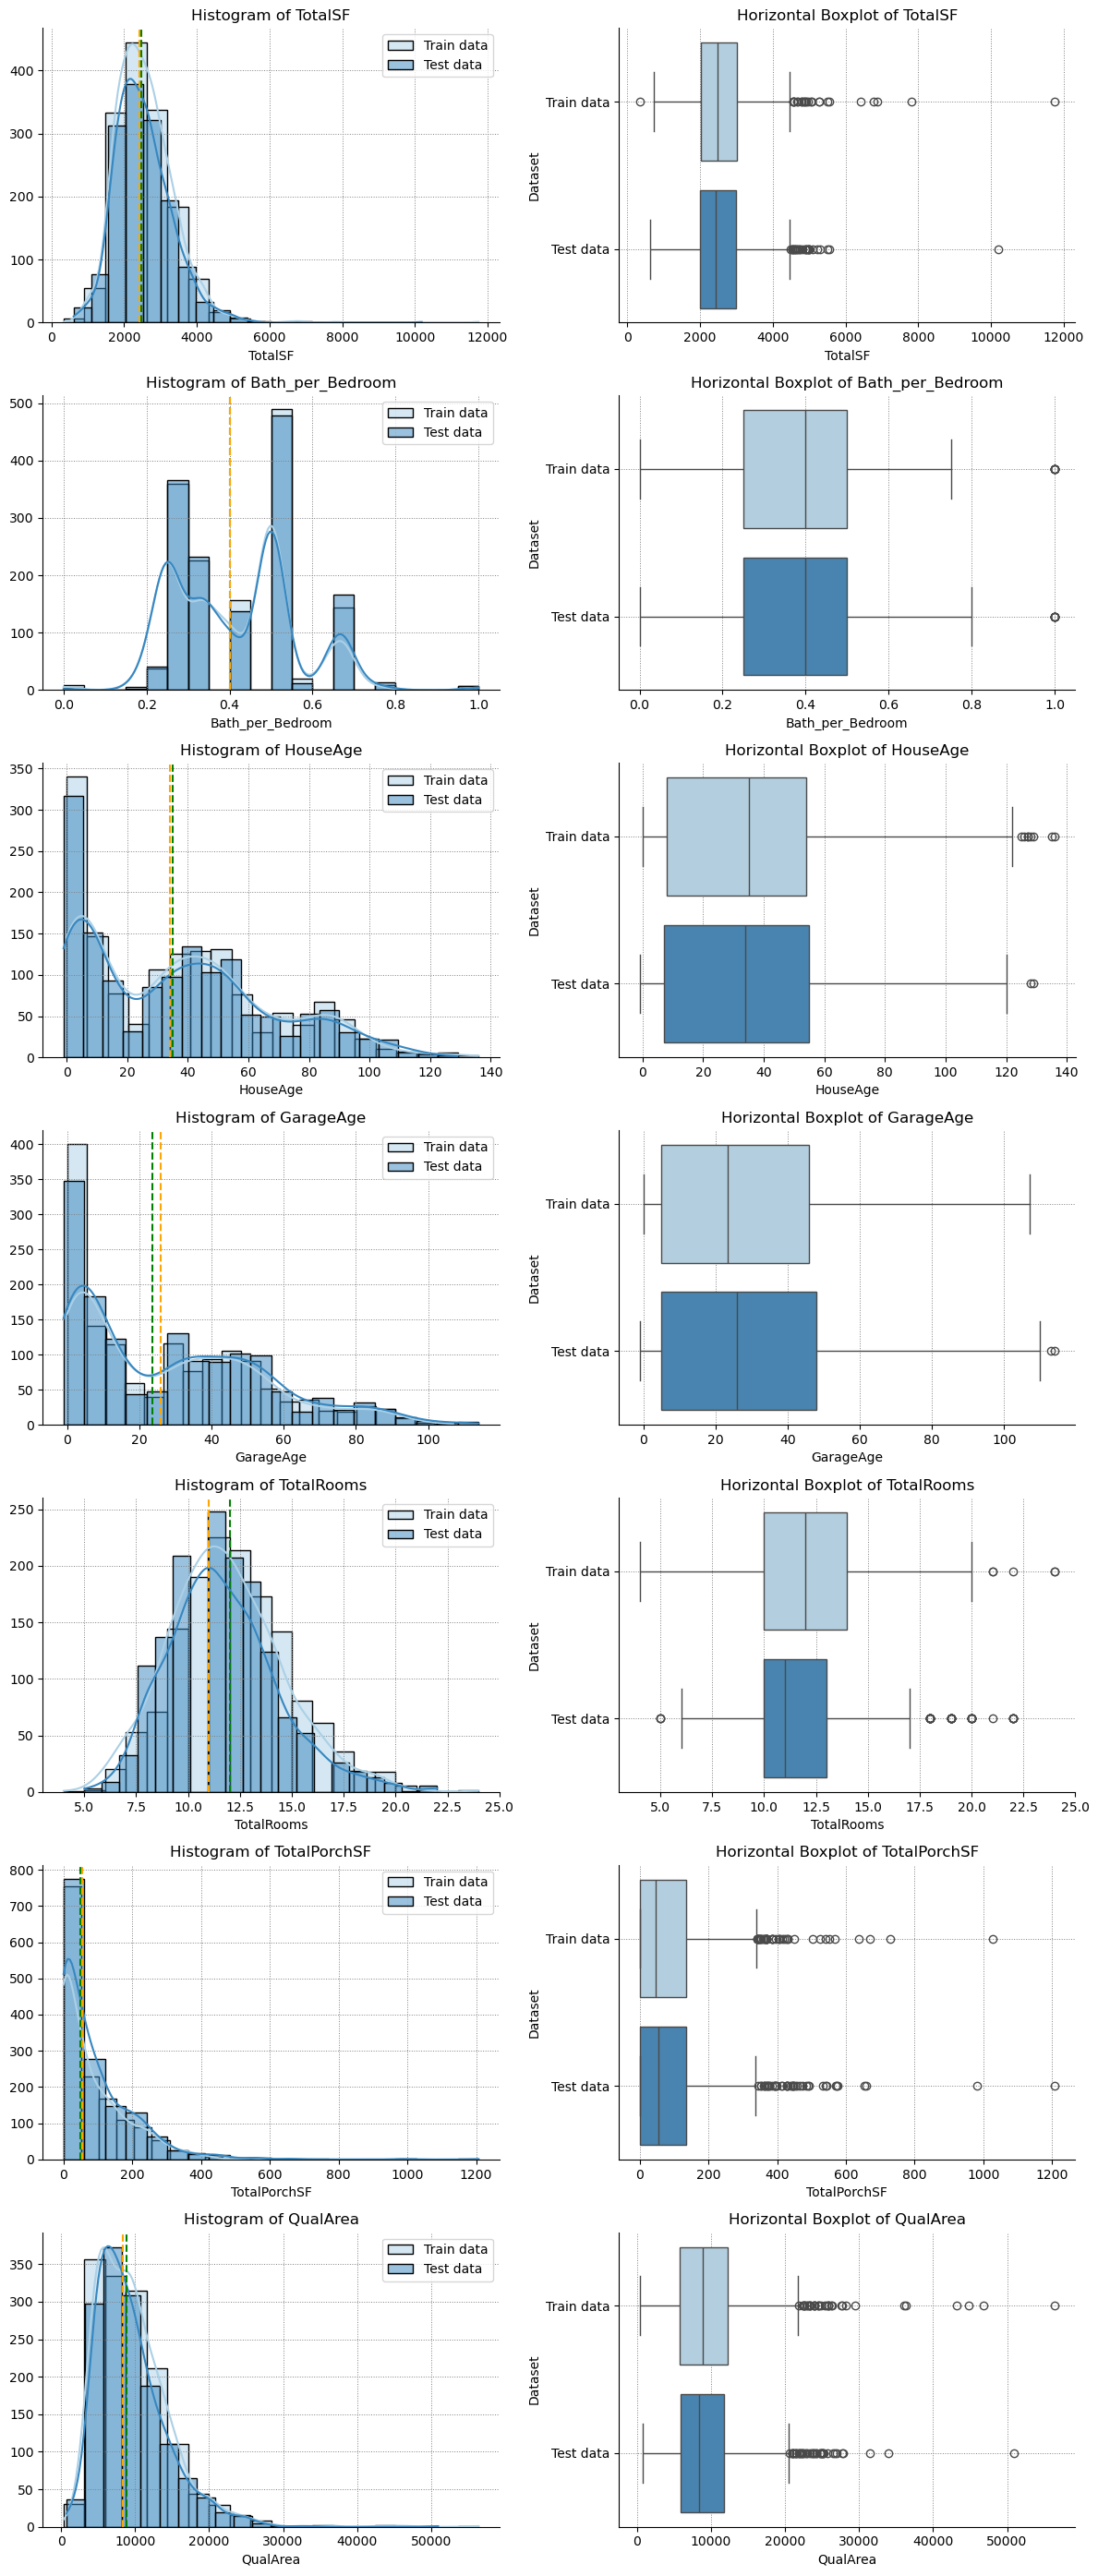

In [30]:
plot_numerical_features(df_train, df_test, num_features=["TotalSF", "Bath_per_Bedroom", "HouseAge", "GarageAge", 
                                                         "TotalRooms", "TotalPorchSF", "QualArea"])

In [38]:
def check_skewness(data, dataset_name, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        if feature == "SalePrice" and dataset_name == "Test data":
            pass # The feature SalePrice only exist in train data.
        else:
            skew = data[feature].skew(skipna=True)
            skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\nSkewness for {dataset_name}:")
    print("-"*60)
    print(f"{'Feature':<21} | {'Skewness':<10} | {'Remark'}")
    print("-"*60)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<21} | {skew:>+9.4f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<21} | {skew:>+9.4f} | {remark}")
    print("-"*60)
    return skew_feature, skew_df

In [39]:
skew_train = check_skewness(data=df_train, dataset_name="Train Data", numerical_features=["TotalSF", "Bath_per_Bedroom", "HouseAge", "GarageAge", 
                                                                                          "TotalRooms", "TotalPorchSF", "QualArea"])
skew_test = check_skewness(data=df_test, dataset_name="Test Data", numerical_features=["TotalSF", "Bath_per_Bedroom", "HouseAge", "GarageAge",
                                                                                       "TotalRooms", "TotalPorchSF", "QualArea"])


Skewness for Train Data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
QualArea              |   +2.0189 | Highly skewed
TotalPorchSF          |   +2.0000 | Highly skewed
TotalSF               |   +1.7767 | Highly skewed
GarageAge             |   +0.7114 | Moderately skewed
HouseAge              |   +0.6090 | Moderately skewed
TotalRooms            |   +0.4709 | Approximately symmetric
Bath_per_Bedroom      |   +0.4154 | Approximately symmetric
------------------------------------------------------------

Skewness for Test Data:
------------------------------------------------------------
Feature               | Skewness   | Remark
------------------------------------------------------------
TotalPorchSF          |   +2.4392 | Highly skewed
QualArea              |   +1.5343 | Highly skewed
TotalSF               |   +1.2080 | Highly skewed
GarageAge             |   +0

In [31]:
num_features.extend(["TotalSF", "Bath_per_Bedroom", "HouseAge", "GarageAge", "TotalRooms", "TotalPorchSF", "QualArea"])
# Moving SalePrice to end list.
if "SalePrice" in num_features:
    num_features.remove("SalePrice")
num_features.append("SalePrice")

In [33]:
def plot_correlation(data = df_train, datasets_name = "Train data"):
  corr_matrix = data.corr(numeric_only=True)
 
  ones_corr = np.ones_like(corr_matrix, dtype=bool)
  mask = np.triu(ones_corr)
  adjusted_mask = mask[1:, :-1]
  adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

  fig, ax = plt.subplots(figsize = (22, 10))
  
  cmap = sns.diverging_palette(240, 240, s=100, l=50, as_cmap=True)

  sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
              annot=True, fmt=".1f", cmap=cmap,
              vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

  title = f"Correlation Heatmap of {datasets_name}"
  ax.set_title(title, loc="center", fontsize=18, weight="bold")

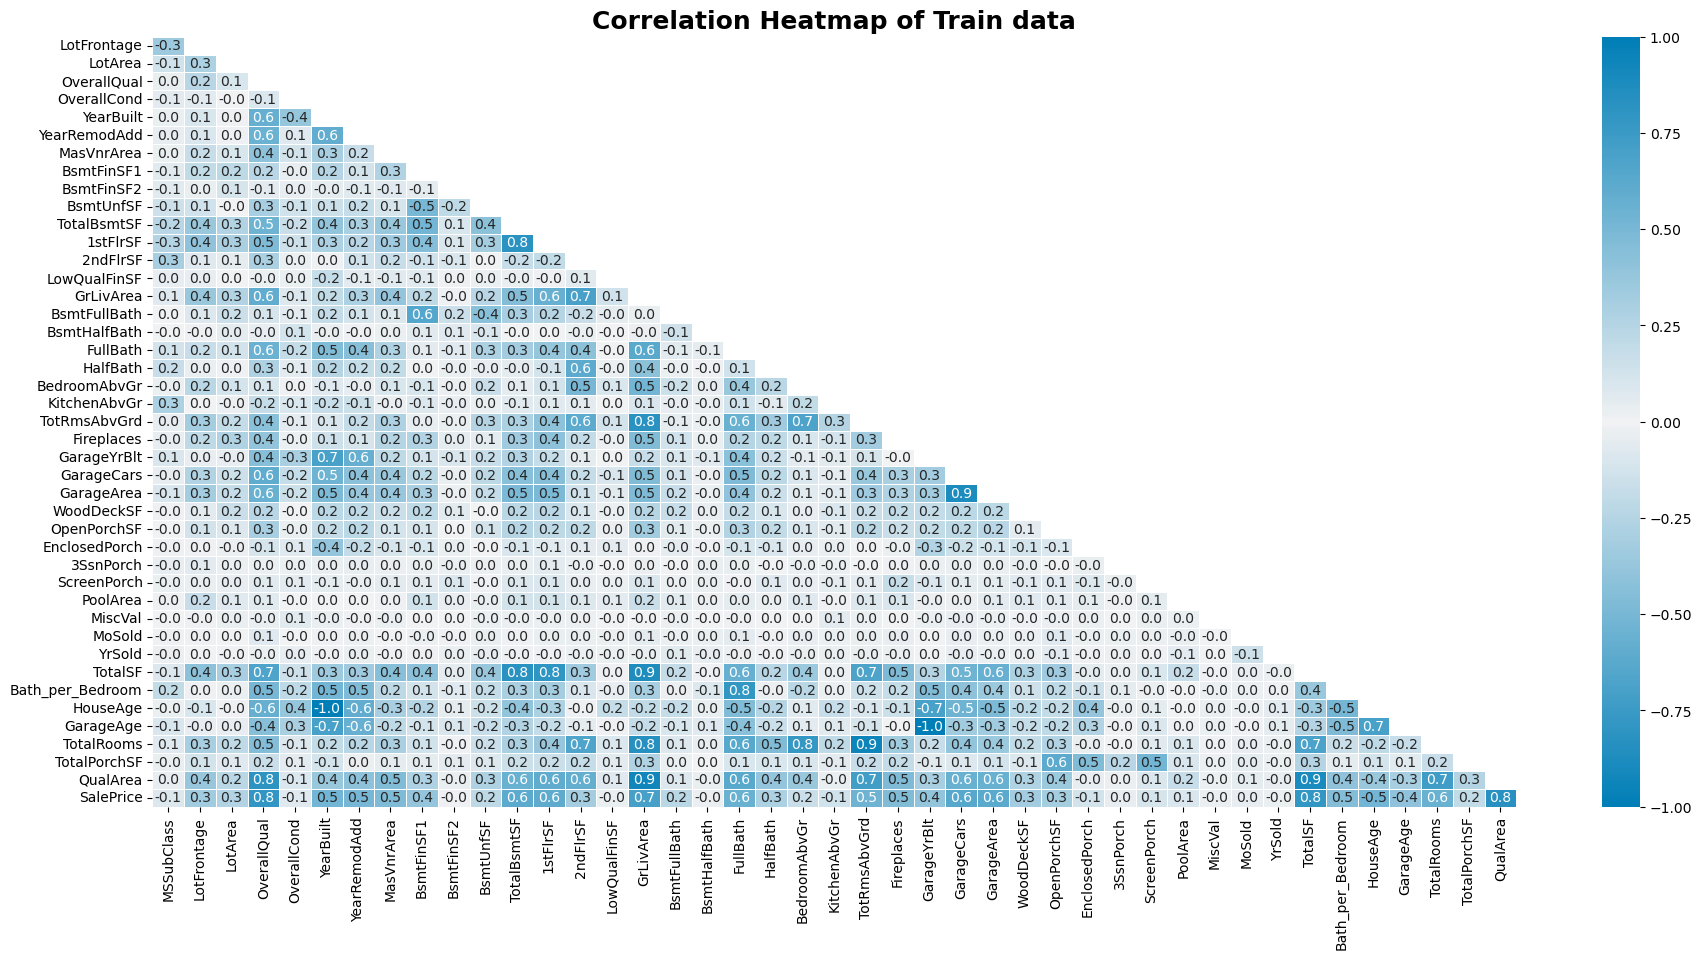

In [34]:
cols = [col for col in df_train.columns if col != "SalePrice"] + ["SalePrice"]
df_train = df_train[cols]
plot_correlation(data=df_train)

### Insights

--> the four newly created variables all have a linear correlation with SalePrice. <br>
- TotalSF: 0.8
- Bath_per_Bedroom: 0.5
- HouseAge: -0.5
- GarageAge: -0.4
- TotalRooms: 0.6

--> The correlation coefficient between HouseAge and SalePrice is -0.5, which means:
The older the house, the lower the selling price. On the contrary, the newer the house, the higher the selling price.
This is a negative correlation and quite strong, reflecting the market reality: new houses are often priced higher than old houses.
    Consistent distribution between train and test helps the model learn well and avoid data drift.
- Some variables have outliers, but reflect market realities (very large houses, very old houses, houses with many rooms)
  
--> - TotalSF (Total usable area): The value Skewness > 1 in both train and test → Highly skewed. This shows that most houses have moderate area, only a few houses have very large area (outlier).
- HouseAge (House age): Skewness around 0.6 in both train and test → Moderately skewed. Most houses are between 10 and 55 years old, a few houses are very old.
- GarageAge (Garage age): Skewness ~0.71 (train) and ~0.73 (test) → Moderately skewed. Most garage are between 10 and 50 years old, a few garage are very old.
- TotalRooms (Total number of rooms): Skewness ~0.47 (train) and ~0.67 (test) → Nearly symmetrical or moderately skewed. The distribution is quite even, not too many outliers.
- Bath_per_Bedroom: Skewness ~0.4–0.5 → Nearly symmetrical or moderately skewed. Reasonable distribution, not too many extreme values.
- TotalPorchSF: Skewness ~2 (train) and ~2.4 (test) -> Highly skewed

The new variables have quite similar distributions between train and test, making the model easy to learn and generalize well. The TotalSF in particular has a large skew, so consider to handle skewness if using linear models.

--> Consistent distribution between train and test helps the model learn well and avoid data drift.
- Some variables have outliers, but reflect market realities (very large houses, very old houses, houses with many rooms)